<a href="https://colab.research.google.com/github/shivambajaj5329/SIER_SIR_Modelling/blob/main/BMI500_Week_11_SUbmission_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.preprocessing import MinMaxScaler


SIR Model

$$
\begin{aligned}
&\frac{d s(t)}{d t}=-\alpha s(t) i(t)+\gamma r(t) \\
&\frac{d i(t)}{d t}=\alpha s(t) i(t)-\beta i(t) \\
&\frac{d r(t)}{d t}=\beta i(t)-\gamma r(t)
\end{aligned}
$$

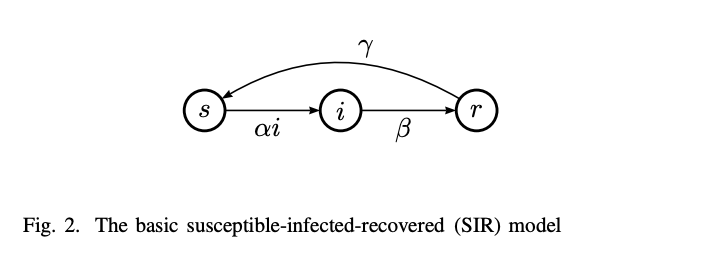

In [2]:
def comp_SIR(t,state, sigma, beta, gamma):
    """
      Function to Computer the SIR MODEL

      S = Susceptible
      I = Infected
      R = Recovered
      sigma = rate of moving from the susceptible group to the infected 
      beta = rate of moving from infected individuals to recovery
      gamma =   rate of moving from recovered individuals to susceptible group

    """


    S, I, R = state
    dSdt = -sigma * S * I + gamma * R 
    dIdt = sigma * S * I - (beta*I) 
    dRdt = beta * I - (gamma * R) 
    return dSdt, dIdt, dRdt

In [3]:
#editable
recovered = 140
infected = 500 
susceptible = 1000
sigma = 0.5
days_to_recover = 14
beta = 0.05
gamma = 0.04
days = [0,150]

In [4]:
sol = solve_ivp(comp_SIR, t_span = days, y0 = [susceptible,infected, recovered], args=(sigma,beta,gamma),dense_output=True)
t = np.linspace(0, 150)
z = sol.sol(t)

In [5]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
z_T_minmax = min_max_scaler.fit_transform(z.T)

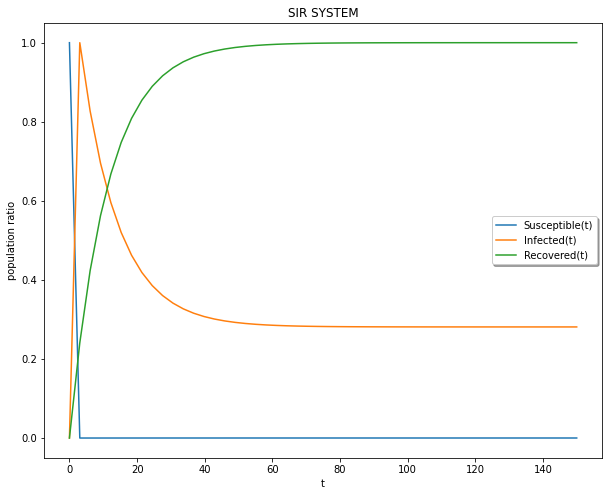

In [6]:
plt.figure(figsize=(10,8))
plt.plot(t, z_T_minmax)
plt.xlabel('t')
plt.ylabel('population ratio')
plt.legend(['Susceptible(t)', 'Infected(t)','Recovered(t)'], shadow=True)
plt.title('SIR SYSTEM')
plt.show()

Model I:
$$
\begin{aligned}
\frac{d s(t)}{d t} &=-\alpha_e s(t) e(t)-\alpha_i s(t) i(t)+\gamma r(t) \\
\frac{d e(t)}{d t} &=\alpha_e s(t) e(t)+\alpha_i s(t) i(t)-\kappa e(t)-\rho e(t) \\
\frac{d i(t)}{d t} &=\kappa e(t)-\beta i(t)-\mu i(t) \\
\frac{d r(t)}{d t} &=\beta i(t)+\rho e(t)-\gamma r(t) \\
\frac{d p(t)}{d t} &=\mu i(t)
\end{aligned}
$$

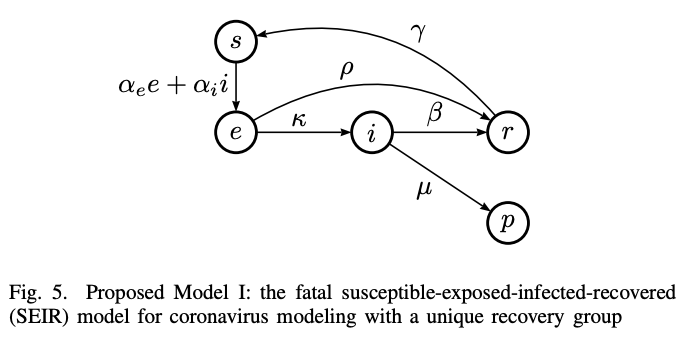

In [7]:
def comp_SEIR(t,state,  sigma_e, sigma_i, kappa, rho, beta, mu, gamma):

  """
  Function to compute SEIR

  S = Susceptible
  E = 
  I = Infected
  R = Recovered
  sigma_e = contagion factor between the exposed and susceptible populations
  sigma_i = contagion factor between the infected and susceptible populations
  kappa = rate of moving from exposed to infected
  rho = recovery rate of the exposed cases
  beta = recovery rate of infected cases
  mu = mortality rate of the infected cases
  gamma = reinfection rate
  """
  S,E,I,R,P = state

  dSdt = (-sigma_e* S*E)-(sigma_i*S*I)+(gamma*R)
  dEdT = sigma_e*S*E + sigma_i*S*I - kappa*E - rho*E
  dIdt = kappa *E - beta*I -mu*I
  dRdt = beta*I+rho*E - gamma*R
  dPdt = mu*I

  return dSdt,dEdT,dIdt,dRdt,dPdt

In [8]:
#editable
exposed_population=20000
infected_population = 4300
recovered_population = 1800
people_died = 350
susceptible = 15000



rate_of_moving_from_exposed_to_infected_kappa = 0.05
rate_of_moving_infected_to_dead_mu = 0.02
rate_of_moving_infected_recovered_beta = 0.1
rate_of_moving_from_exposed_to_recovered_rho = 0.08
rate_of_moving_from_recovered_to_suscep_gamma = 0.001
sigma_e = 0.65
sigma_i=0.005

days = [0,300]

In [9]:
sol = solve_ivp(comp_SEIR, t_span = days, y0 = [susceptible,exposed_population,infected_population, recovered,people_died], args=(sigma_e,
                                                                                                                                  sigma_i,
                                                                                                                                  rate_of_moving_from_exposed_to_infected_kappa,
                                                                                                                                  rate_of_moving_from_exposed_to_recovered_rho,
                                                                                                                                  rate_of_moving_infected_recovered_beta,
                                                                                                                                  rate_of_moving_infected_to_dead_mu,
                                                                                                                                  rate_of_moving_from_recovered_to_suscep_gamma),dense_output=True)
t = np.linspace(0, 300)
z = sol.sol(t)

In [10]:
min_max_scaler = MinMaxScaler()
z_T_minmax = min_max_scaler.fit_transform(z.T)

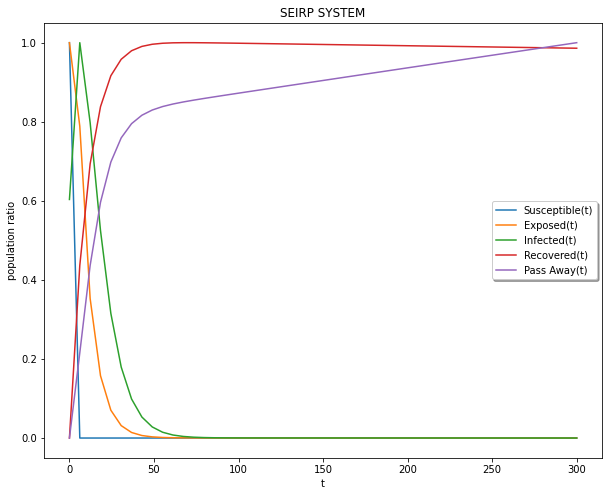

In [11]:
plt.figure(figsize=(10,8))
plt.plot(t, z_T_minmax)
plt.xlabel('t')
plt.ylabel('population ratio')
plt.legend(['Susceptible(t)','Exposed(t)', 'Infected(t)','Recovered(t)','Pass Away(t)'], shadow=True)
plt.title('SEIRP SYSTEM')
plt.show()

Source for all Figure images and equations : 
Sameni, R.. Mathematical Modeling of Epidemic Diseases; A Case Study of the COVID-19 Coronavirus. (https://arxiv.org/abs/2003.11371)

